## `Importing Libraries`


In [47]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc




## `Step 1: Load and Inspect Data`


### importing Datasets


In [53]:
# Load the training and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [54]:
# Inspect the first few rows of the datasets
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
# Check for missing values and data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## `Step 2: Data Cleaning and Preparation`

Identify and handle missing values, duplicates, and any inconsistencies in the data.


### Checking Missing values


In [58]:
# Check for missing values in train and test datasets
print("\nMissing Values in Train Data:")
train_data.isnull().sum()




Missing Values in Train Data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
print("\nMissing Values in Test Data:")
test_data.isnull().sum()


Missing Values in Test Data:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Handling Missing Values For Numerical Columns


In [60]:
# Exclude the target column 'Survived' from the numeric columns
# Ensure only numeric columns are selected, excluding 'Survived'
numeric_cols = train_data.select_dtypes(include=['number']).columns.drop('Survived', errors='ignore')

# categorical columns in dataset
categorical_cols = train_data.select_dtypes(include=['object']).columns



### Handling Missing Values For Numerical Columns


In [61]:
# Handle missing values for numeric columns
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].median())
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].median())




### Handling Missing Values For Numerical Columns


In [62]:
# Handle missing values for categorical columns
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])
test_data[categorical_cols] = test_data[categorical_cols].fillna(test_data[categorical_cols].mode().iloc[0])



### CHECKING after removing missing values


In [63]:
print("Verifiny missing values are removed from Train data:")
print(train_data.isnull().sum())


print("Verifiny missing values are removed from Test data:")
print(test_data.isnull().sum())

Verifiny missing values are removed from Train data:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Verifiny missing values are removed from Test data:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## `Step 3: Exploratory Data Analysis (EDA)`


In [64]:
# Summary statistics
print("\nSummary Statistics:")
train_data.describe()



Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


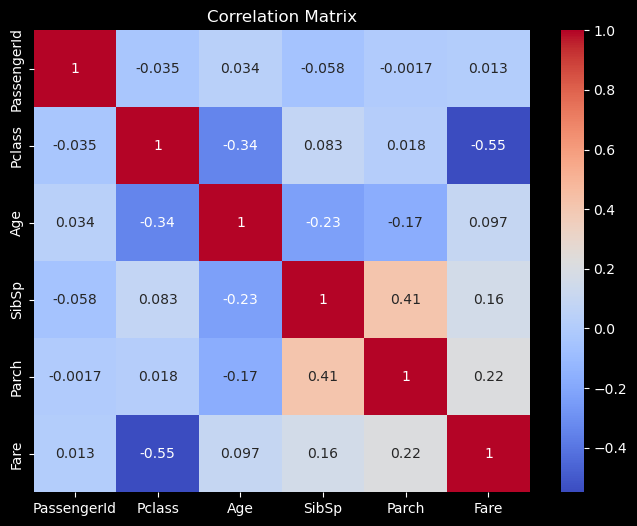

In [65]:
# Calculate the correlation matrix
correlation_matrix = train_data[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



From above correlation matrix, the key observations from the correlation matrix are:

- The diagonal elements of the matrix are all 1, as each feature is perfectly correlated with itself.
- The off-diagonal elements show the correlation coefficients between different features.
- The color scale indicates the strength and direction of the correlations, with red representing strong negative correlations, blue representing strong positive correlations, and white representing weak or no correlations.
- The strongest correlation is between SibSp (number of siblings/spouses) and Parch (number of parents/children), which have a correlation coefficient of 0.41. This indicates a moderate positive relationship between these two features.
- The feature with the strongest negative correlation is Pclass (passenger class) with Fare, with a correlation coefficient of -0.55. This suggests that as the passenger class increases, the fare paid tends to decrease.
- Most of the other correlations are relatively weak, with absolute values less than 0.35, indicating that the features are largely independent of each other.


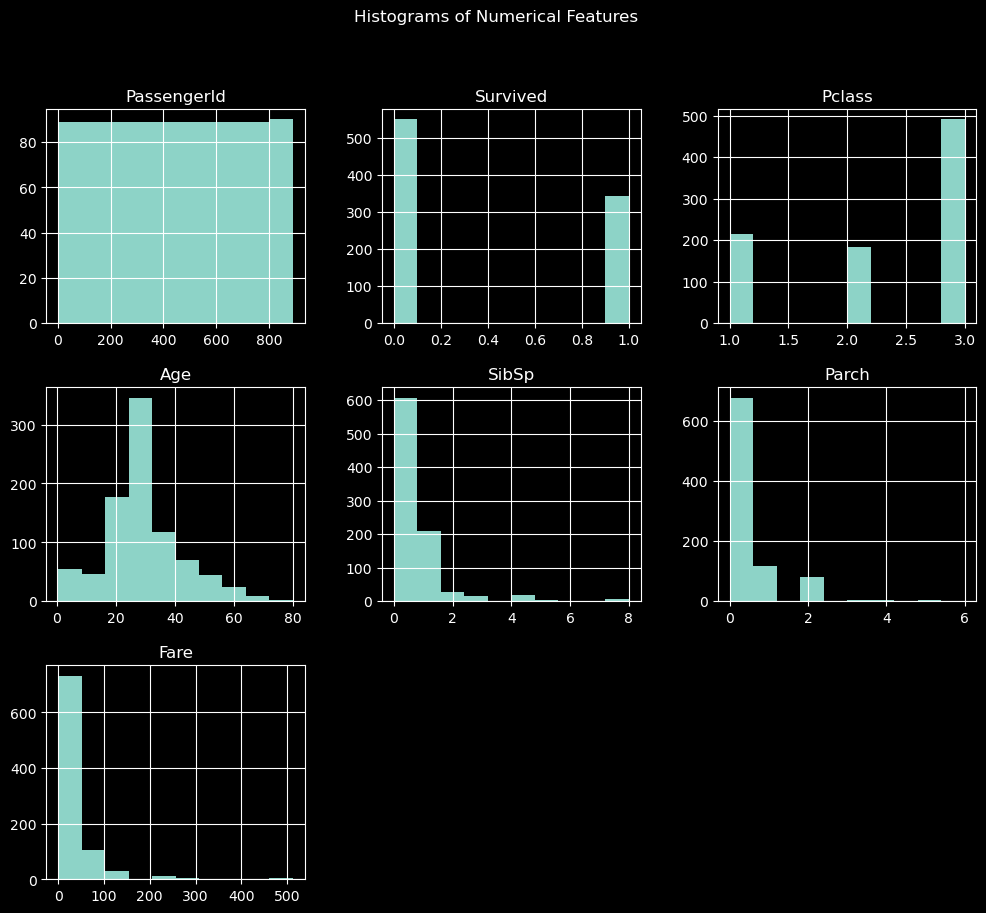

In [66]:
# Histograms for numerical features
train_data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


Histograms that visualize the distribution of various numerical features in the dataset. The features include:

1. Passengerid: This histogram shows the distribution of passenger IDs, which appear to be evenly distributed across the range.
2. Survived: This histogram displays the number of passengers who survived, with a clear peak around 0.5, indicating roughly half of the passengers survived.
3. Pclass: This histogram shows the distribution of passenger class, with the majority being in the 1st and 3rd classes.
4. Age: The age histogram has a bimodal distribution, with peaks around the younger and middle-aged passengers.
5. SibSp: The histogram for the number of siblings/spouses on board shows a concentration around 0, with decreasing frequencies as the number increases.
6. Parch: Similarly, the histogram for the number of parents/children on board also shows a concentration around 0, with lower frequencies as the number increases.
7. Fare: The fare histogram exhibits a right-skewed distribution, indicating a larger number of passengers with lower fares and fewer passengers with higher fares.


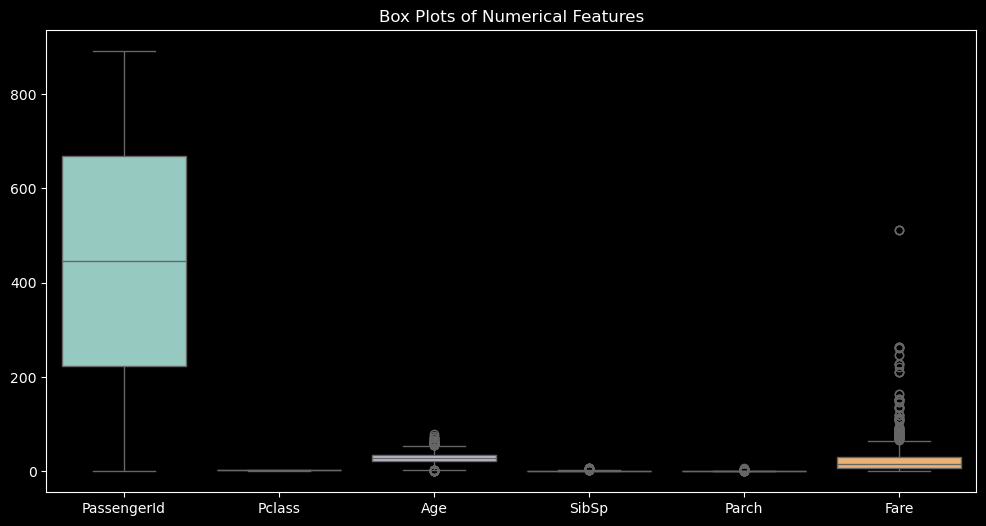

In [67]:
# Box plots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data[numeric_cols])
plt.title('Box Plots of Numerical Features')
plt.show()

### Removing Outliers from columns


In [68]:
# Assume the data is in a pandas DataFrame named 'train_data'
df = train_data.copy()

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the IQR for each numeric feature
q1 = df[numeric_cols].quantile(0.25)
q3 = df[numeric_cols].quantile(0.75)
iqr = q3 - q1

# Identify and remove outliers
df_clean = df[~((df[numeric_cols] < (q1 - 1.5 * iqr)) | (df[numeric_cols] > (q3 + 1.5 * iqr))).any(axis=1)]

In [69]:
numeric_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### Let's verify Oultiers removal


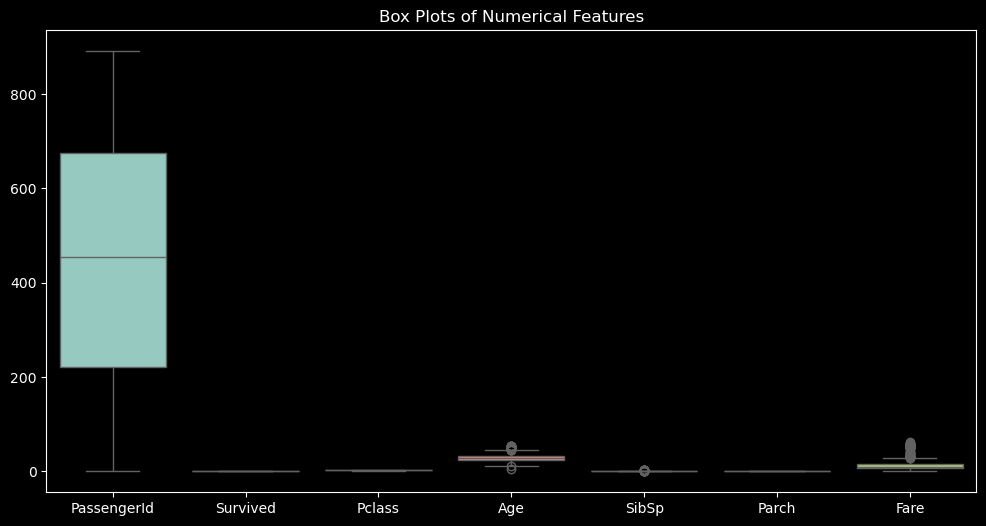

In [70]:
# Box plots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean)
plt.title('Box Plots of Numerical Features')
plt.show()

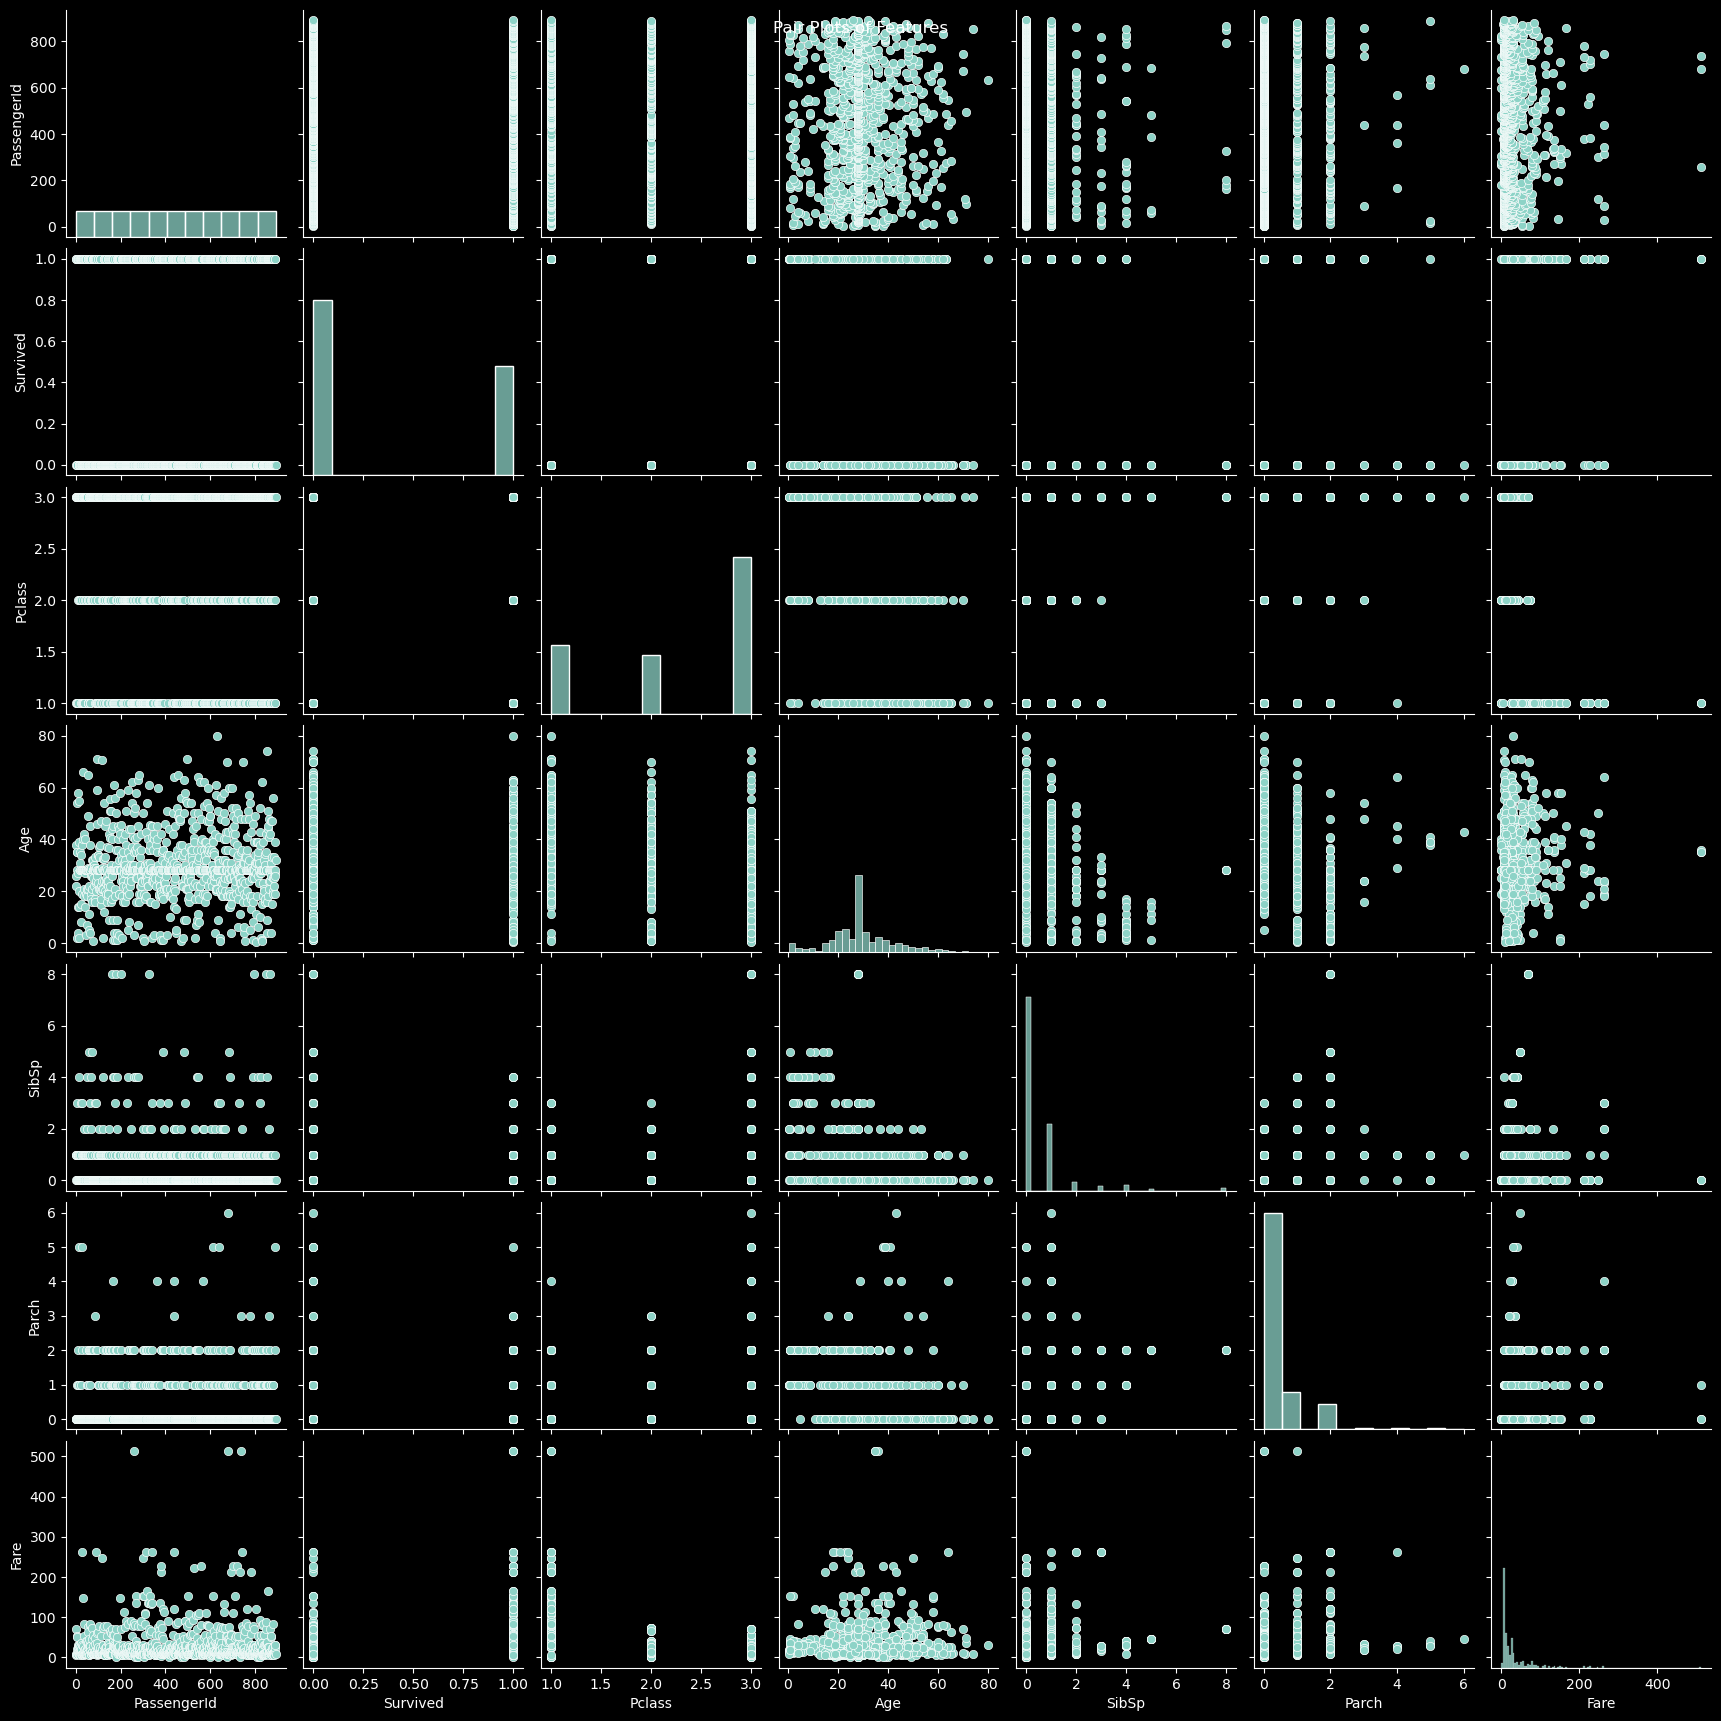

In [71]:
# Pair plots for feature relationships
sns.pairplot(train_data[numeric_cols])
plt.suptitle('Pair Plots of Features')
plt.show()

## `Observations:`

- Passengerid: The histogram shows a uniform distribution of passenger IDs, suggesting the dataset contains data for a wide range of passengers.
- Survived: The histogram has a bimodal distribution, indicating that roughly half of the passengers survived the incident.
- Pclass: The histogram shows that the majority of passengers were in the 1st and 3rd classes, with fewer in the 2nd class.
- Age: The histogram displays a skewed distribution, with a concentration of younger passengers and a smaller number of older passengers.
- SibSp and Parch: The histograms for the number of siblings/spouses and parents/children on board both show a concentration around 0, with fewer passengers having larger numbers of family members.
- Fare: The histogram for the fare paid by passengers exhibits a right-skewed distribution, with a large number of passengers paying lower fares and fewer paying higher fares.


## `Step 4: Feature Engineering`


### Encoding Categorical Columns


In [72]:
# Encoding categorical variables
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

# Align train and test data for consistency
train_data, test_data = train_data.align(test_data, join='inner', axis=1)


## `Step 5: Model Building and Evaluation`


In [74]:
train_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Connolly, Miss. Kate","Name_Kelly, Mr. James",Sex_male,Ticket_110813,...,Cabin_E34,Cabin_E46,Cabin_E50,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,38.0,1,0,71.2833,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,3,35.0,0,0,8.0500,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [75]:


# Define features and target variable
X = train_data.drop('Embarked_S', axis=1)
y = train_data['Embarked_S']




### Spliting Dataset


In [76]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the feautures


In [108]:
import joblib

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Training the Logistic Regression Model


In [97]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Prediction and Evaluation


In [98]:
# Predict and evaluate
y_pred = model.predict(X_val_scaled)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred))




Model Evaluation:
Accuracy: 0.7821229050279329


In [99]:
confusion_matrix(y_val, y_pred)

array([[ 23,  37],
       [  2, 117]], dtype=int64)

In [100]:
classification_report(y_val, y_pred)

'              precision    recall  f1-score   support\n\n       False       0.92      0.38      0.54        60\n        True       0.76      0.98      0.86       119\n\n    accuracy                           0.78       179\n   macro avg       0.84      0.68      0.70       179\nweighted avg       0.81      0.78      0.75       179\n'

## `Step 6: Prediction on Test Data`


In [110]:
# We've already trained your model and loaded the scaler
# Transform test data using the loaded scaler
X_test_scaled = scaler.transform(test_data.drop('Embarked_S', axis=1))

# Predict on standardized test data
test_predictions = model.predict(X_test_scaled)

# Save predictions to a CSV file
output = pd.DataFrame({'Id': test_data.index, 'Prediction': test_predictions})
output.to_csv('test_predictions.csv', index=False)
print("\nTest Predictions Saved to 'test_predictions.csv'")



Test Predictions Saved to 'test_predictions.csv'
